In [13]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy
import matplotlib.pyplot as plt
import sklearn
import sklearn.neural_network

In [14]:
InputData = pd.read_excel('ML_ExampleDataSet.xlsx','InputVariables')
#InputData.index = InputData['Sample_No'] # Make the "Sample_No" column as index of the data
InputData = InputData.set_index('Sample_No',drop = False)
InputData # Show the first few rows of the data

,Sample_No,U,SigmaU,Alpha,MannL,MannGamma,VeerDeltaPhi
Sample_No,,,,,,,
1,1,4.000000,0.100000,-0.650000,7.500000,1.000000,-22.250000
2,2,10.150758,1.208656,-0.139692,48.470634,1.363636,-4.771217
3,3,6.813467,2.261463,0.129071,88.379710,1.727273,-3.981593
4,4,14.500000,0.704260,0.332996,122.142857,2.090909,0.162810
5,5,5.356299,1.776301,1.147039,160.357143,2.454545,2.639008
...,...,...,...,...,...,...,...
9996,9996,15.991490,2.934493,-0.031461,271.543107,3.760740,14.080259
9997,9997,6.111425,0.948102,0.176589,8.454959,4.124377,41.866315
9998,9998,13.326172,2.043617,0.345013,46.669245,4.488013,-6.197441


In [15]:
TargetData = pd.read_excel('ML_ExampleDataSet.xlsx','LoadResults')
TargetData.set_index('PointNo', drop = False, inplace = True) # Make the "PointNo" column as index of the data
TargetData # Show the first few rows of the data

,PointNo,Tower_top_fore_aft_M_x,Tower_top_side2side_M_y,Tower_base_fore_aft_M_x,Tower_base_side2side_M_y,Yaw_moment_M_z,Main_shaft_torsion_M_z,Blade_root_flapwise_M_x,Blade_root_edgewise_M_y
PointNo,,,,,,,,,
1,1,747.561872,200.666288,6708.717789,8861.885588,1229.076579,63.457528,4253.317748,15006.726860
2,2,3556.031457,676.339081,16692.647572,6329.099515,6952.985180,1354.995442,10409.290476,16289.414152
3,3,4667.540374,1337.390736,47357.937376,31829.036012,10138.140146,2804.304402,13755.148891,16535.154243
4,4,2468.757942,242.431345,8130.594535,3871.907737,4216.051060,250.684887,12307.312889,16500.098901
5,5,3261.845253,1035.420007,36971.924749,26395.063750,6630.640795,2256.349794,13128.763279,16207.306417
...,...,...,...,...,...,...,...,...,...
9996,9996,6564.464434,858.778565,28091.651088,13608.101268,14513.682848,1147.107370,21518.552601,16773.394758
9997,9997,2047.344061,385.287048,22144.619831,16663.888804,3024.747490,676.705869,3891.227781,15376.750042
9998,9998,5958.074303,646.040924,20715.173212,7395.479028,11789.005321,740.922800,19334.780023,17384.510924


In [16]:
%%timeit -n 10
MergedData = pd.merge(InputData,TargetData, how = 'inner', on = [InputData['Sample_No'],TargetData['PointNo']])

2.58 ms ± 337 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
%%timeit -n 10
AllInputData = InputData.where(InputData['Sample_No']==TargetData['PointNo'])
AllTargetData = TargetData.where(TargetData['PointNo']==InputData['Sample_No'])

3.07 ms ± 318 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
AllInputData = InputData.where(InputData['Sample_No']==TargetData['PointNo'])
AllTargetData = TargetData.where(TargetData['PointNo']==InputData['Sample_No'])
AllInputData.drop(columns = 'Sample_No', inplace = True)
AllTargetData.drop(columns = 'PointNo', inplace = True)
nsamples = AllInputData['U'].count() # Find the total number of data points in the data frame
FeatureNames = AllInputData.columns.values
DependentVariableNames = AllTargetData.columns.values
print('Feature names: ', FeatureNames)
print('Dependent variable names: ', DependentVariableNames)
print(AllInputData.iloc[:,0].values)

Feature names:  ['U' 'SigmaU' 'Alpha' 'MannL' 'MannGamma' 'VeerDeltaPhi']
Dependent variable names:  ['Tower_top_fore_aft_M_x' 'Tower_top_side2side_M_y'
 'Tower_base_fore_aft_M_x' 'Tower_base_side2side_M_y' 'Yaw_moment_M_z'
 'Main_shaft_torsion_M_z' 'Blade_root_flapwise_M_x'
 'Blade_root_edgewise_M_y']
[ 4.         10.1507576   6.81346652 ... 13.32617204  9.2987816
 19.89821019]


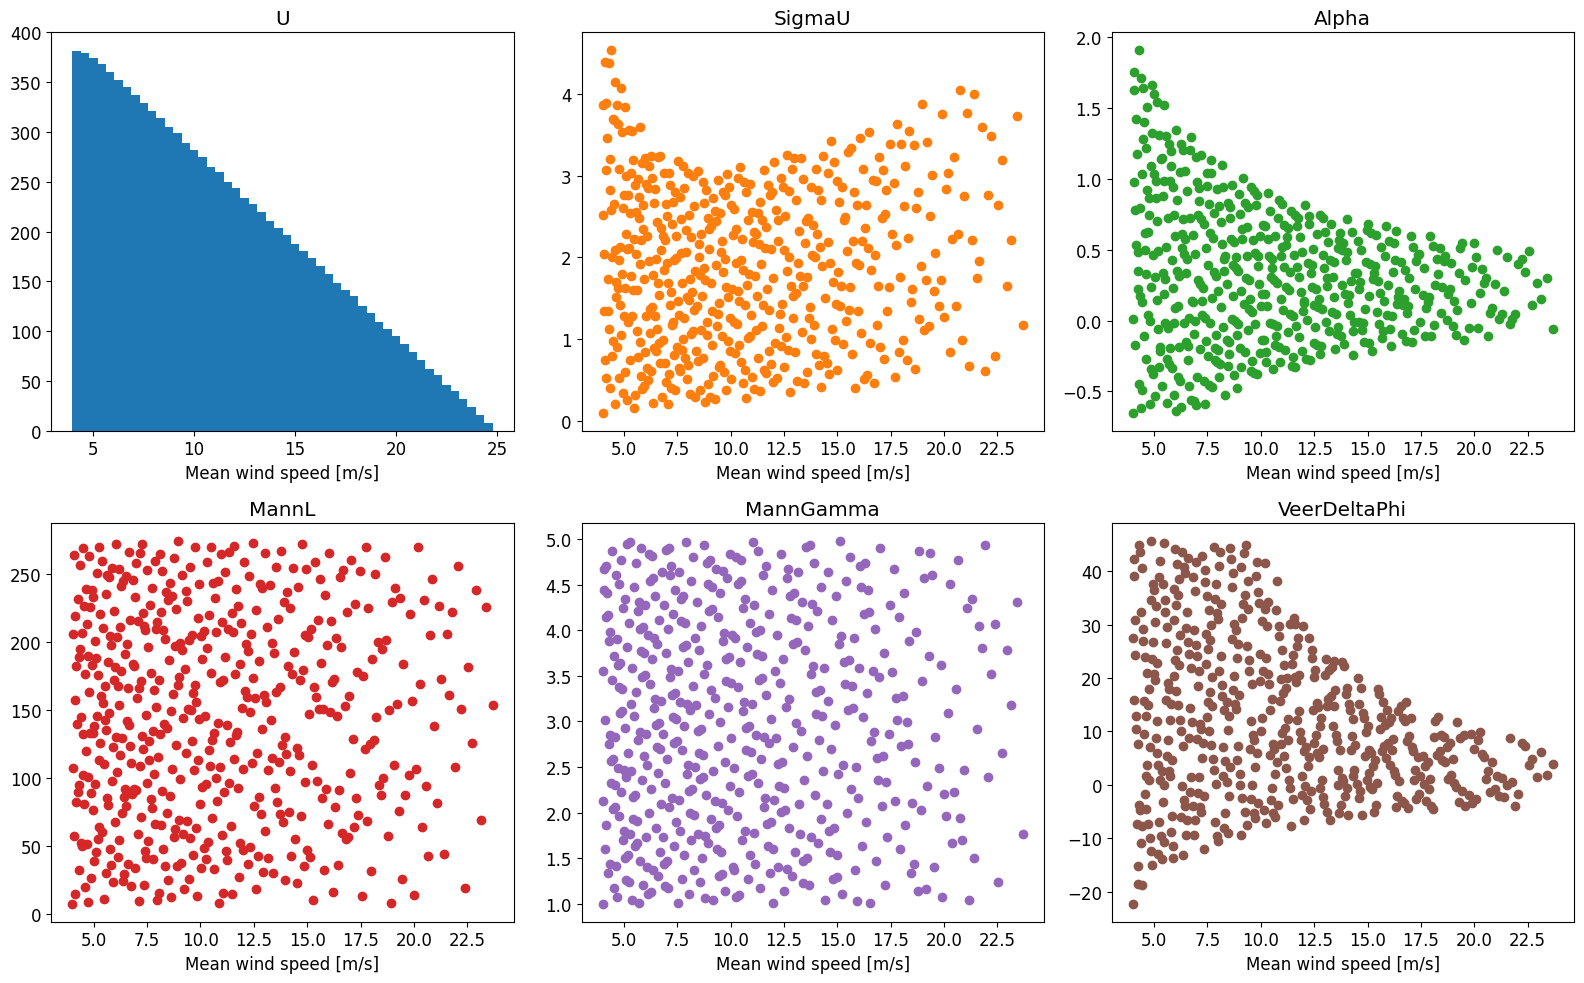

In [19]:

nplotpoints = 500
plt.rc('font', size=12) 
fig1,axs1 = plt.subplots(2,3,figsize = (16,10))
plt.setp(axs1,xlabel = "Mean wind speed [m/s]")
plt.setp(axs1[0,0], title = FeatureNames[0])
plt.setp(axs1[0,1], title = FeatureNames[1])
plt.setp(axs1[0,2], title = FeatureNames[2])
plt.setp(axs1[1,0], title = FeatureNames[3])
plt.setp(axs1[1,1], title = FeatureNames[4])
plt.setp(axs1[1,2], title = FeatureNames[5])
axs1[0,0].hist(AllInputData.iloc[:,0],50,color = 'C0')
axs1[0,1].plot(AllInputData.iloc[0:nplotpoints,0],AllInputData.iloc[0:nplotpoints,1],'o',color = 'C1')
axs1[0,2].plot(AllInputData.iloc[0:nplotpoints,0],AllInputData.iloc[0:nplotpoints,2],'o',color = 'C2')
axs1[1,0].plot(AllInputData.iloc[0:nplotpoints,0],AllInputData.iloc[0:nplotpoints,3],'o',color = 'C3')
axs1[1,1].plot(AllInputData.iloc[0:nplotpoints,0],AllInputData.iloc[0:nplotpoints,4],'o',color = 'C4')
axs1[1,2].plot(AllInputData.iloc[0:nplotpoints,0],AllInputData.iloc[0:nplotpoints,5],'o',color = 'C5')
plt.tight_layout()             
plt.show()

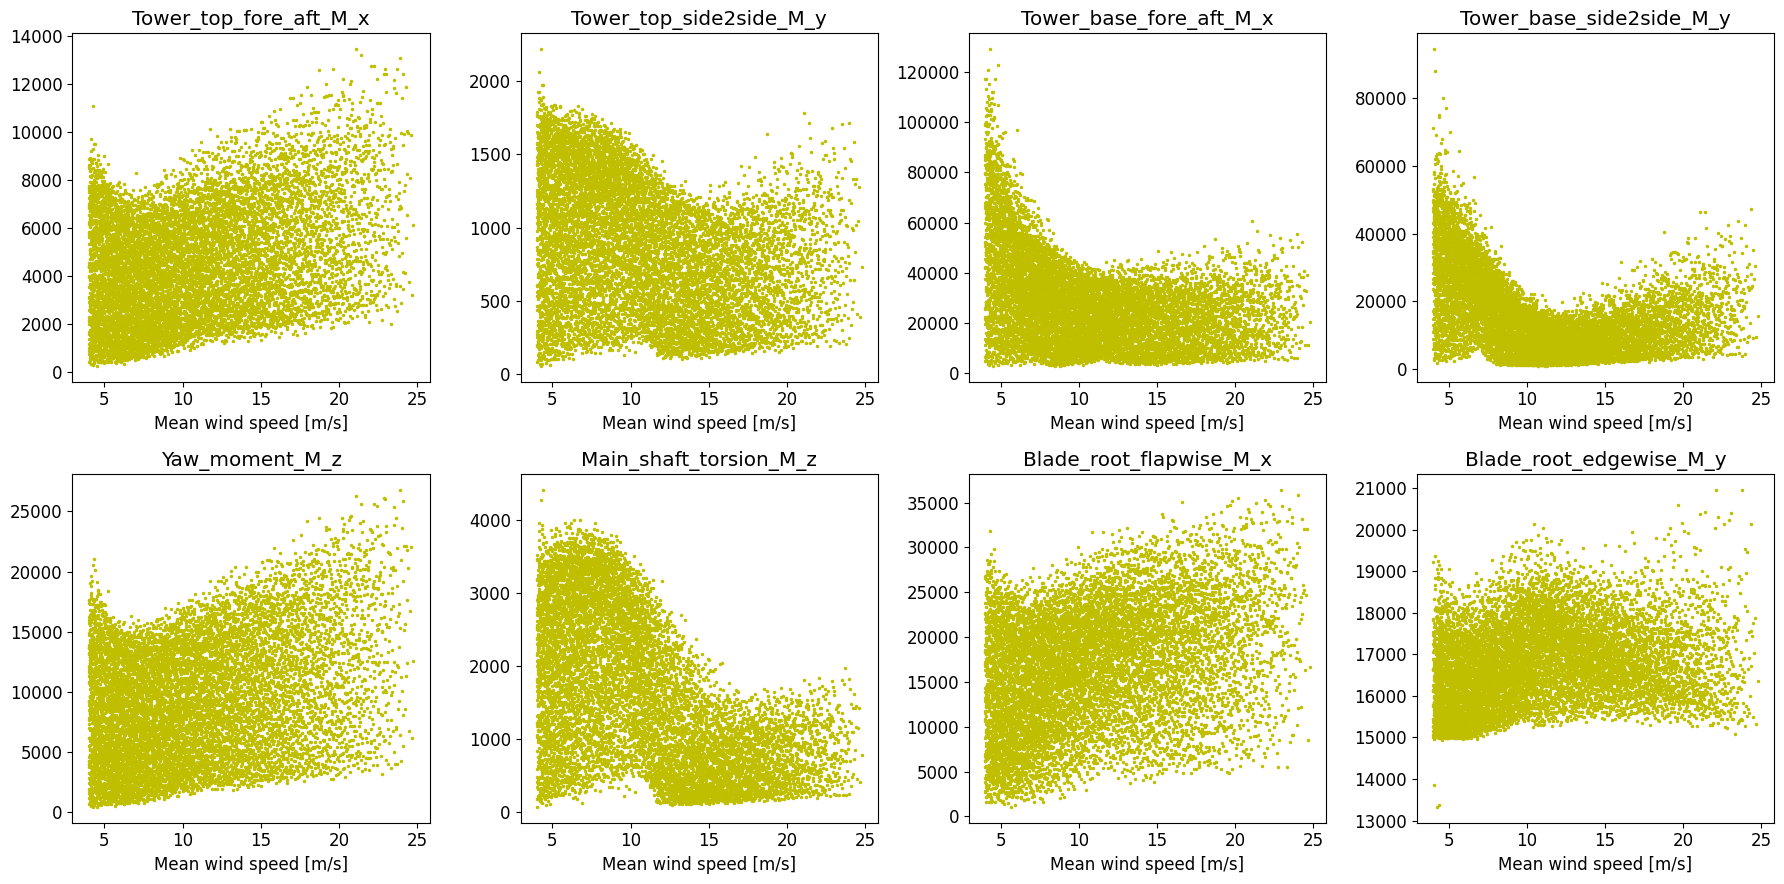

In [30]:
fig2 = plt.figure(2, figsize = (18,9))

for i in range(DependentVariableNames.shape[0]):
    axi = fig2.add_subplot(2,4,i+1)
    plt.title(DependentVariableNames[i])
    plt.plot(AllInputData.U,AllTargetData.iloc[:,i],'y.',markersize = 3)
    plt.xlabel('Mean wind speed [m/s]')
    #plt.ylabel(DependentVariableNames[i])
plt.tight_layout()
plt.show()

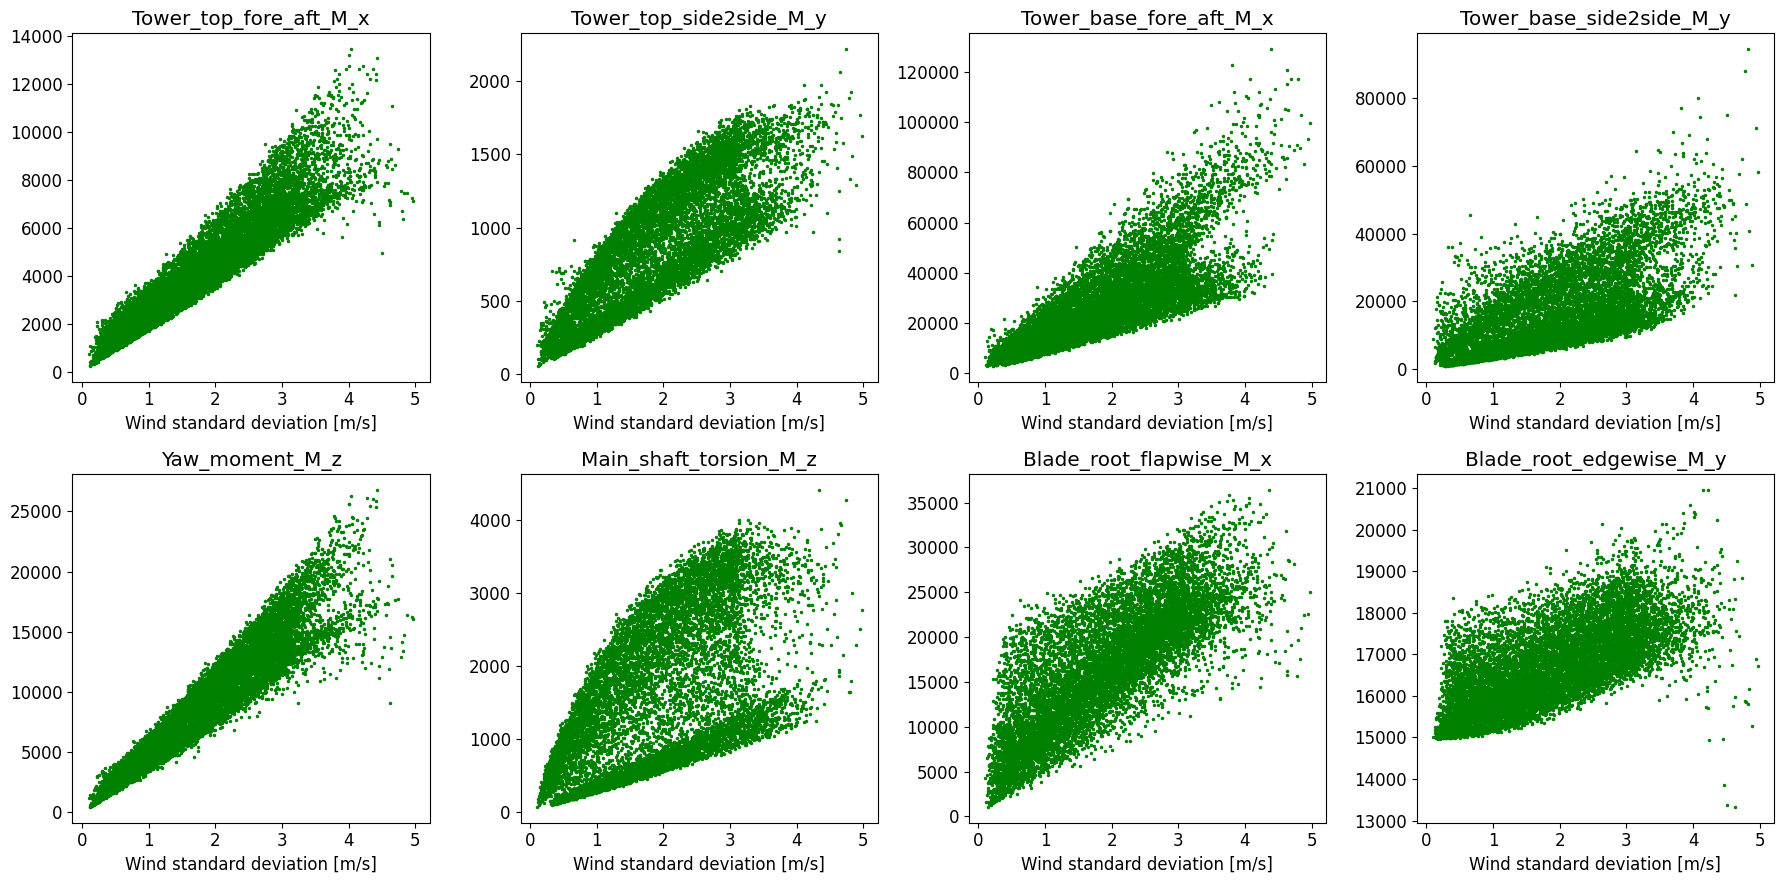

In [29]:
fig3 = plt.figure(3, figsize = (18,9))

for i in range(DependentVariableNames.shape[0]):
    axi = fig3.add_subplot(2,4,i+1)
    plt.title(DependentVariableNames[i])
    plt.plot(AllInputData.SigmaU,AllTargetData.iloc[:,i],'g.',markersize = 3)
    plt.xlabel('Wind standard deviation [m/s]')
    #plt.ylabel(DependentVariableNames[i])
plt.tight_layout()
plt.show()

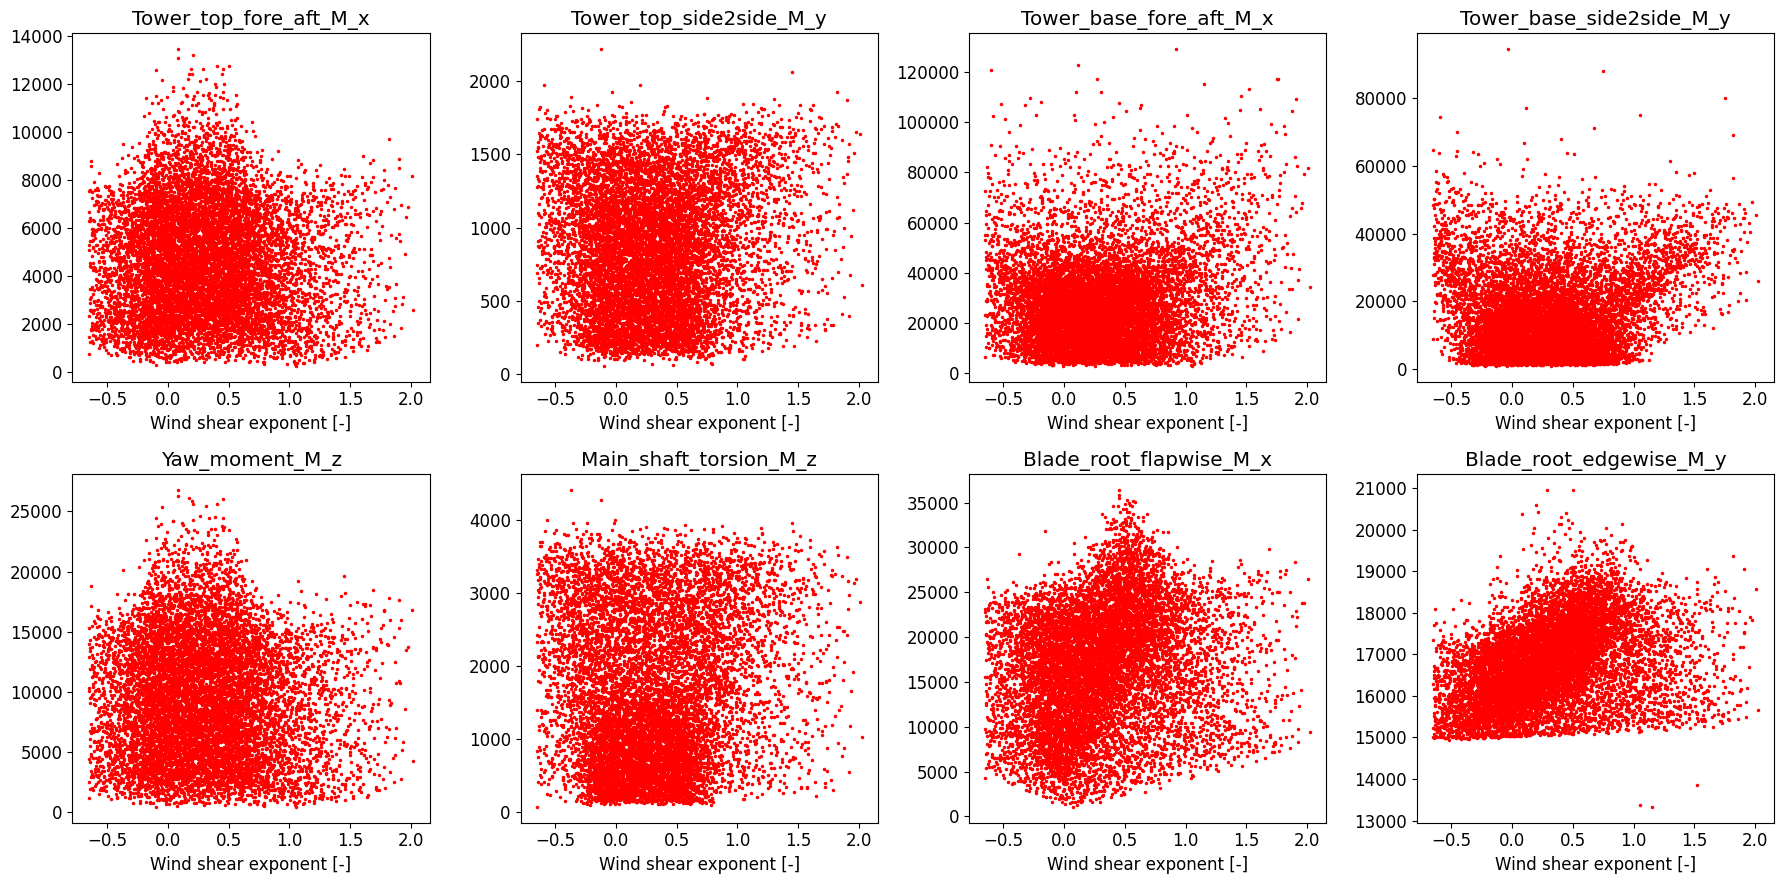

In [28]:
fig4 = plt.figure(3, figsize = (18,9))

for i in range(DependentVariableNames.shape[0]):
    axi = fig4.add_subplot(2,4,i+1)
    plt.title(DependentVariableNames[i])
    plt.plot(AllInputData.Alpha,AllTargetData.iloc[:,i],'r.',markersize = 3)
    plt.xlabel('Wind shear exponent [-]')
    #plt.ylabel(DependentVariableNames[i])
plt.tight_layout()
plt.show()

In [32]:
from __future__ import print_function, division
import numpy as np
from scipy import linalg
from smt.utils.misc import compute_rms_error

from smt.problems import Sphere, NdimRobotArm, Rosenbrock
from smt.sampling_methods import LHS
from smt.surrogate_models import LS, QP, KPLS, KRG, KPLSK, GEKPLS, MGP

#to ignore warning messages
import warnings
warnings.filterwarnings("ignore")

try:
    from smt.surrogate_models import IDW, RBF, RMTC, RMTB
    compiled_available = True
except:
    compiled_available = False

try:
    import matplotlib.pyplot as plt
    plot_status = True
except:
    plot_status = False

import scipy.interpolate

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [34]:
### Linear Model

In [40]:
########### The LS model

for i in range(DependentVariableNames.shape[0]):
    
    xt = np.array(AllInputData.U)
    yt = np.array(AllTargetData.iloc[:,i])
    
    ndim = 2
    ndoe = 20 #int(10*ndim)
    # Define the function
    fun = Rosenbrock(ndim=ndim)
    
    # Construction of the validation points
    ntest = 200 #500
    sampling = LHS(xlimits=fun.xlimits, criterion='ese', random_state=1)
    xtest = sampling(ntest)
    ytest = fun(xtest)
    
    # Initialization of the model
    t = LS(print_prediction = False)

    # Add the DOE
    t.set_training_values(xt,yt)

    # Train the model
    t.train()

    # Prediction of the validation points
    y = t.predict_values(xtest)
    print('LS,  err: '+str(compute_rms_error(t,xtest,ytest)))

    # Plot prediction/true values
    if plot_status:

        fig = plt.figure()
        plt.plot(ytest, ytest, '-', label='$y_{true}$')
        plt.plot(ytest, y, 'r.', label='$\hat{y}$')

        plt.xlabel('$y_{true}$')
        plt.ylabel('$\hat{y}$')

        plt.legend(loc='upper left')
        plt.title('LS model: validation of the prediction model')

___________________________________________________________________________
   
                                    LS
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 9980
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.0095396


ValueError: x should have shape [:, 1] or [:]

In [41]:
xtest

array([[ 1.95186865e+00, -9.72854605e-01],
       [-9.47340646e-02,  1.03138989e+00],
       [ 8.17599966e-01, -1.78669270e-01],
       [ 1.79381884e+00, -1.66933669e+00],
       [ 7.59476042e-01,  9.29314198e-01],
       [-3.97209685e-02,  7.09909584e-02],
       [ 7.86866925e-01,  5.39475671e-01],
       [-2.93652752e-01, -2.34701609e-01],
       [-1.64616246e+00,  1.86913951e+00],
       [ 1.11832611e+00, -4.03063424e-01],
       [ 9.31377160e-01,  1.04933760e+00],
       [ 1.96542309e-01,  1.51463457e+00],
       [ 7.32438387e-01, -1.98559351e+00],
       [-1.05183726e+00,  9.83746687e-02],
       [ 1.70711410e+00, -1.51739943e+00],
       [ 1.47407034e+00,  1.78959404e-01],
       [ 1.30289091e+00,  3.28313242e-02],
       [-2.26615342e-01,  1.89017032e+00],
       [ 3.60310666e-01,  1.01749923e+00],
       [-5.35485813e-01, -1.01503841e-01],
       [ 1.96762032e+00,  1.50113243e-01],
       [-6.02729163e-01,  3.96147211e-01],
       [ 2.22619937e-01,  1.11330638e-02],
       [-1.

In [42]:
ntest

200